# Capturing Non-Linearity with Kernels

### Authors: James Chapman, Sahan Bulathwela and John Shawe-Taylor

## Introduction

This exercise aims to help you understand how kernel functions can be used to increase the experssivity of the model family by allowing the model to look for non-linear solutions while using a linear family. 

## Expressivity vs generalisation

When the solution space we search has access to relatively complex solutions (e.g. in contrast to linear solutions), we are increasing the expressivity of models. This in tern reduces the generalisation capabilities of the model and can risk overfitting. 

### Loading Data

We use a synthesised dataset for today's exercise. We start by taking the simpler dataset where the features have a linear relationship with the target veriable. 

In [1]:
#DO NOT CHANGE THIS CODE
import numpy as np
import matplotlib.pyplot as plt
X_train=np.loadtxt('./data/X_train_linear.txt')
X_test=np.loadtxt('./data/X_test_linear.txt')
y_train=np.loadtxt('./data/y_train_linear.txt')
y_test=np.loadtxt('./data/y_test_linear.txt')

### 1) Linear Regression
#### a) estimate w and b using linear regression based on the training data (X_train, y_train)

In [2]:
from sklearn.linear_model import LinearRegression

linear=LinearRegression().fit(X_train,y_train)
w=linear.coef_

#### b) calculate the mean squared error for the training data and test data

In [3]:
def mean_squared_error(y_predicted, y_true):
    return np.mean((y_predicted-y_true)**2)

print(f"Training error: {mean_squared_error(linear.predict(X_train),y_train)}")
print(f"Test error: {mean_squared_error(linear.predict(X_test),y_test)}")

Training error: 0.6192069491444596
Test error: 0.7134675543943784


### 2) Exploring the effects of dimensionality
#### a) Using different sized subsets of the training data, repeat (1) and illustrate the trends of training error and test error as the sample size is increased

*** Hint:*** You may use a visualisation to explore this relationship.


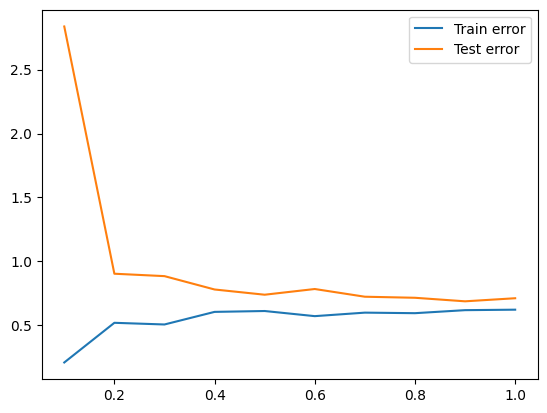

In [4]:
subsets=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
training_error=[]
test_error=[]
for s in subsets:
    n=int(s*len(X_train))
    model=LinearRegression(fit_intercept=False).fit(X_train[:n],y_train[:n])
    y_train_pred=model.predict(X_train[:n])
    training_error.append(mean_squared_error(y_train_pred,y_train[:n]))
    y_test_pred=model.predict(X_test)
    test_error.append(mean_squared_error(y_test_pred,y_test))

plt.plot(subsets,training_error, label='Train error')
plt.plot(subsets,test_error, label='Test error')
plt.legend()

### 3) Regularisation (Ridge Regression)

In this section, we penalise the model for choosing high complexity using L2-Regularisation, aiming to *improve generalisability*.

#### a) Using a suitable plot, demonstrate the effect of ridge regeularisation on the train and test error

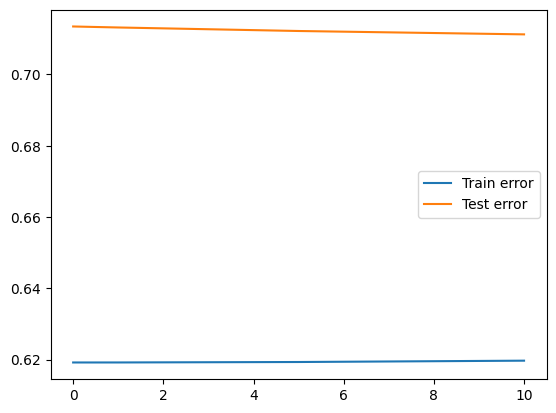

In [5]:
from sklearn.linear_model import Ridge

alpha=[0,0.5,1,5, 10]
training_error=[]
test_error=[]
for a in alpha:
    model=Ridge(alpha=a).fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    training_error.append(mean_squared_error(y_train_pred,y_train))
    y_test_pred=model.predict(X_test)
    test_error.append(mean_squared_error(y_test_pred,y_test))

plt.plot(alpha,training_error, label='Train error')
plt.plot(alpha,test_error, label='Test error')
plt.legend()

#### b) Using a suitable metric or plot, demonstrate the effect of ridge regularisation on the estimated weights

Text(0, 0.5, 'L2 norm of weights')

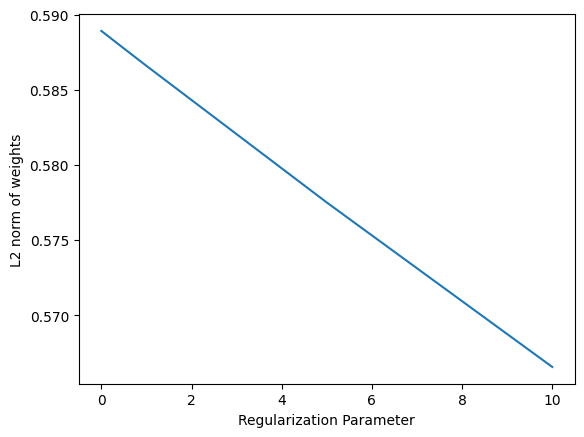

In [6]:
from sklearn.linear_model import Ridge

norm=[]
for a in alpha:
    model=Ridge(alpha=a).fit(X_train,y_train)
    norm.append(np.linalg.norm(model.coef_))

plt.plot(alpha,norm)
plt.xlabel('Regularization Parameter')
plt.ylabel('L2 norm of weights')

## 4) Kernel Regression

In this section, we aim to use kernelisation, which allows the solution to provide a solution that can go beyond linear modelling. This modification, *increases expressivity* of the downstream model.

### a) Demonstrate the equivalence of Ridge and Kernel Ridge Regression when using a linear kernel

First, we use a "linear" kernel, where we solve the regression problem using the dual form, but the solution is equivalent to the primal form linear regression. 

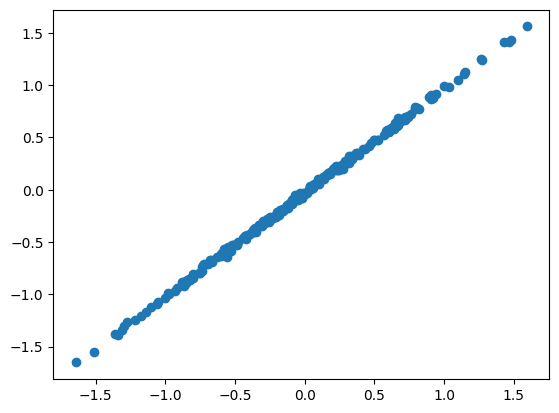

In [7]:
from sklearn.kernel_ridge import KernelRidge

krr=KernelRidge(alpha=1e-3).fit(X_train,y_train)
ridge=Ridge(alpha=1e-3).fit(X_train,y_train)

plt.scatter(krr.predict(X_train),ridge.predict(X_train))

### b) Construct the feature space represented by a polynomial kernel with degree 2 and demonstrate that for small values of ridge regularisation, the predictions of ridge regression with the explicit feature space and kernel ridge regression with the kernel representation are the same (or similar)

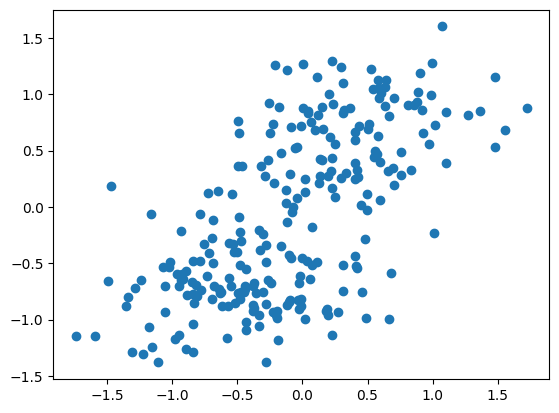

In [8]:
phi_train=np.hstack((np.ones((len(X_train),1)),2*X_train,X_train**2))
ridge=Ridge(alpha=1e-1).fit(phi_train, y_train)
krr=KernelRidge(alpha=1e-1,kernel='poly',degree=2, coef0=0).fit(X_train,y_train)
plt.scatter(ridge.predict(phi_train),krr.predict(X_train))

### c) Using the following data plot the train and test error for kernel ridge regression with polynomial kernel of different degrees

In [9]:
#DO NOT CHANGE THIS CODE
X_train=np.loadtxt('./data/X_train_poly.txt')
X_test=np.loadtxt('./data/X_test_poly.txt')
y_train=np.loadtxt('./data/y_train_poly.txt')
y_test=np.loadtxt('./data/y_test_poly.txt')

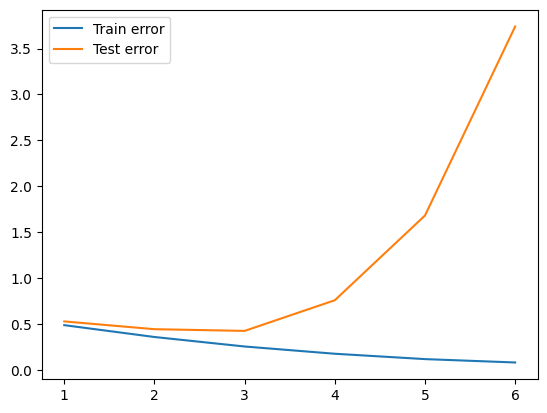

In [10]:
degree=[1,2,3,4,5,6]
training_error=[]
test_error=[]
for d in degree:
    model=KernelRidge(kernel='poly', degree=d).fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    training_error.append(mean_squared_error(y_train_pred,y_train))
    y_test_pred=model.predict(X_test)
    test_error.append(mean_squared_error(y_test_pred,y_test))

plt.plot(degree,training_error, label='Train error')
plt.plot(degree,test_error, label='Test error')
plt.legend()

### d) Repeat 3a) for a polynomial kernel with degree of your choice

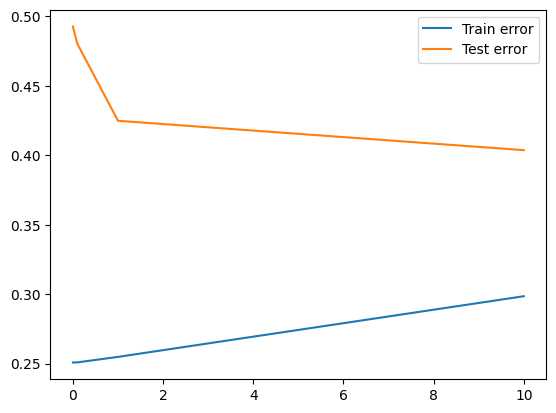

In [16]:
alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
training_error = []
test_error = []
for a in alpha:
    model = KernelRidge(alpha=a, kernel='poly', degree=3).fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    training_error.append(mean_squared_error(y_train_pred, y_train))
    y_test_pred = model.predict(X_test)
    test_error.append(mean_squared_error(y_test_pred, y_test))

plt.plot(alpha, training_error, label='Train error')
plt.plot(alpha, test_error, label='Test error')
plt.legend()

### e) Using the following data demonstrate compare the performance of kernel ridge regression with rbf kernel and polynomial kernel

In [13]:
#DO NOT CHANGE THIS CODE
X_train=np.loadtxt('./data/X_train_poly.txt')
X_test=np.loadtxt('./data/X_test_poly.txt')
y_train=np.loadtxt('./data/y_train_poly.txt')
y_test=np.loadtxt('./data/y_test_poly.txt')

In [17]:
from sklearn.model_selection import GridSearchCV

krr_rbf = GridSearchCV(
    KernelRidge(kernel="rbf", gamma=0.1),
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
).fit(X_train,y_train)

krr_poly = GridSearchCV(
    KernelRidge(kernel="poly", gamma=0.1),
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "degree": [1,2,3,4,5]},
).fit(X_train,y_train)

print(f"Training error poly: {mean_squared_error(krr_poly.predict(X_train),y_train)}")
print(f"Training error rbf: {mean_squared_error(krr_rbf.predict(X_train),y_train)}")
print(f"Test error poly: {mean_squared_error(krr_poly.predict(X_test),y_test)}")
print(f"Test error rbf: {mean_squared_error(krr_rbf.predict(X_test),y_test)}")

Training error poly: 0.27930665923157394
Training error rbf: 0.26317685068358004
Test error poly: 0.3989428709145533
Test error rbf: 0.3689924045833392
